### Loading

In [6]:
import pandas as pd
import numpy as np
import dask
import os
import matplotlib.pyplot as plt

PATH_BITMEX_DATA = '/Users/mmark/crypto-sobcap-data/bitmex'

In [36]:
def list_data(instrument, style, format_type='.parquet', verbose=True, return_type='dates'):
    path = os.path.join(PATH_BITMEX_DATA, instrument, style)
    files = [f for f in os.listdir(path) if f.endswith(format_type)]
    file_paths = [os.path.join(path, f) for f in files]
    if verbose:
        file_sizes = np.sum([os.path.getsize(f) for f in file_paths])
        print(f'Total size: {file_sizes/1e6} MB')
    dates = [f.split('.')[0] for f in files]
    dates.sort()
    file_paths.sort()
    if return_type == 'dates':
        return dates
    elif return_type =='paths':
        return file_paths
    else:
        raise ValueError("Unknown return type. Use 'dates' or 'paths'.")

def load_data(symbol, date, style='trans', format_type='.parquet'):
    parq_path = os.path.join(PATH_BITMEX_DATA, symbol, style, date+format_type)
    df = pd.read_parquet(parq_path)
    if style == 'quotes':
        df['midprice'] = (df.ask + df.bid)/2
    return df

In [44]:
sample_date = '2020-09-21'
eth_quotes = load_data('ETHUSD', sample_date, 'quotes')
eth_trans = load_data('ETHUSD', sample_date, 'trans')

In [45]:
zoom_quotes = eth_quotes.between_time('12:00','12:01')

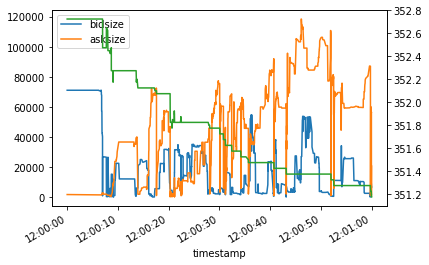

In [46]:
zoom_quotes[['bidsize', 'asksize']].plot()
zoom_quotes['midprice'].plot(secondary_y=True)

In [52]:
eth_trans.price.max()

377.2

In [53]:
eth_trans.price.min()

330.9

In [55]:
my_bins = np.arange(eth_trans.price.min(), eth_trans.price.max(), 5)
my_bins

array([330.9, 335.9, 340.9, 345.9, 350.9, 355.9, 360.9, 365.9, 370.9,
       375.9])

In [60]:
np.arange(0, 1, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [59]:
my_bins[2]

340.9

In [56]:
cut, bins = pd.cut(eth_trans.price, my_bins, retbins=True)

In [68]:
profile = eth_trans.groupby(pd.cut(eth_trans.price, my_bins)).sum().volume

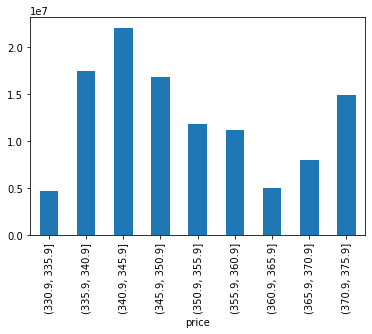

In [69]:
profile.plot.bar()

In [70]:
eth_trans.groupby(pd.cut(eth_trans.price, 15)).sum().volume

price
(330.854, 333.987]     2316394
(333.987, 337.073]     4509153
(337.073, 340.16]     12007071
(340.16, 343.247]     12651445
(343.247, 346.333]    14894515
(346.333, 349.42]     13353147
(349.42, 352.507]      5458211
(352.507, 355.593]     6973481
(355.593, 358.68]      7710622
(358.68, 361.767]      5150608
(361.767, 364.853]     3230808
(364.853, 367.94]      4964621
(367.94, 371.027]      3843204
(371.027, 374.113]     4482718
(374.113, 377.2]      11032740
Name: volume, dtype: int64

In [27]:
eth_quotes.between_time('12:00','12:01')

,bid,ask,bidsize,asksize
timestamp,,,,
2020-04-12 12:00:00+00:00,158.70,158.75,780,95574
2020-04-12 12:00:07.247000+00:00,158.70,158.75,780,92574
2020-04-12 12:00:07.262000+00:00,158.70,158.75,152,92574
2020-04-12 12:00:07.664000+00:00,158.70,158.75,152,95574
2020-04-12 12:00:07.672000+00:00,158.70,158.75,152,98074
...,...,...,...,...
2020-04-12 12:00:58.310000+00:00,159.05,159.10,79419,65504
2020-04-12 12:00:58.811000+00:00,159.05,159.10,79419,65937
2020-04-12 12:00:58.953000+00:00,159.05,159.10,64419,65937


In [13]:
pd.Timestamp('2020-04-12 14:00:00', tz='UTC')

Timestamp('2020-04-12 14:00:00+0000', tz='UTC')

In [12]:
eth_quotes.index

DatetimeIndex(['2020-04-12 01:16:54.780000+00:00',
               '2020-04-12 01:16:54.899000+00:00',
               '2020-04-12 01:16:54.966000+00:00',
               '2020-04-12 01:16:57.417000+00:00',
               '2020-04-12 01:16:58.445000+00:00',
               '2020-04-12 01:17:00.150000+00:00',
               '2020-04-12 01:17:01.164000+00:00',
               '2020-04-12 01:17:01.187000+00:00',
               '2020-04-12 01:17:01.193000+00:00',
               '2020-04-12 01:17:01.227000+00:00',
               ...
               '2020-04-12 23:59:59.688000+00:00',
               '2020-04-12 23:59:59.744000+00:00',
               '2020-04-12 23:59:59.748000+00:00',
               '2020-04-12 23:59:59.786000+00:00',
               '2020-04-12 23:59:59.795000+00:00',
               '2020-04-12 23:59:59.814000+00:00',
               '2020-04-12 23:59:59.826000+00:00',
               '2020-04-12 23:59:59.842000+00:00',
               '2020-04-12 23:59:59.885000+00:00',
            